In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder





In [19]:
#Task 1
df = pd.read_csv('ontario_public_library_statistics_2022_open_data.csv', encoding='ISO-8859-1')
df.head()


# Display the head of the dataset
df.head()


,Library Full Name,Library Number,Survey Year From,A1.3 Ontario Library Service (OLS) Region (English),A1.4 Type of Library Service (English),A1.5 Mailing Address,A1.9 Street Address,A1.10 City/Town,A1.11 Province,A1.12 Postal Code,...,H1.9.1.T Yes,H1.9.2.51 Chamber of Commerce,H1.9.2.52 Business Improvement Area (BIA),H1.9.2.95 Other Business and Economic Sector Partnerships,H1.9.3 Please provide highlights or examples of your librarys partnerships with the business and economic sector:,P1.1 Resident Population Served,P1.2 Contracting Population Served,P2.1 Contracting Households Served,P2.2 Resident Households Served,Unnamed: 328
0,Addington Highlands Twp,L0005,2022,Southern Ontario Library Service,Public or Union Library,3641 Flinton Rd. Box 72,3641 Flinton Rd.,Flinton,Ontario,K0H1P0,...,0,0,0,0,0,"1,712",0,0,"2,762",0
1,Adjala-TosorontioTwp,L0003,2022,Southern Ontario Library Service,Contracting Municipality,7855 Sideroad 30 R.R. #1,7855 Sideroad 30 R.R. #1,Alliston,Ontario,L9R1V1,...,0,0,0,0,0,"10,975",0,0,"4,103",0
2,Admaston/Bromley Twp,L0002,2022,Southern Ontario Library Service,Public or Union Library,Hwy 60 P O Box 130,5346 Highway 60,Douglas,Ontario,K0J1S0,...,0,0,0,0,0,"2,935",0,0,"1,408",0
3,Ajax,L0032,2022,Southern Ontario Library Service,Public or Union Library,55 Harwood Avenue South,55 Harwood Avenue South,Ajax,Ontario,L1S2H8,...,1,0,0,2,0,"127,400",0,0,"38,400",0
4,Alberton Twp,L1098,2022,Ontario Library Service - North,Contracting Municipality,3 Highway 611 South RR1B2,3 Highway 611 South RR1B2,Township of Alberton,Ontario,P9A3M2,...,0,0,0,0,0,969,0,0,373,0


In [20]:
# Get summary statistics of the numerical columns
df.describe()



,Survey Year From,C0.4.F French Special Collections - Original Format,C3.1.F French Print Periodical Titles Held,C3.2.0.F French Databases and Database Subscriptions,C3.2.0.O Other Databases and Database Subscriptions,C4.1.F No,C4.1.T Yes,"C4.2 If yes, how many",C4.3.01 Freegal,C4.3.02 Freading,...,H1.8.1.T Yes,H1.8.3.F No,H1.8.3.T Yes,H1.9.1.F No,H1.9.1.T Yes,H1.9.2.51 Chamber of Commerce,H1.9.2.52 Business Improvement Area (BIA),H1.9.2.95 Other Business and Economic Sector Partnerships,H1.9.3 Please provide highlights or examples of your librarys partnerships with the business and economic sector:,Unnamed: 328
count,364.0,364.000000,364.000000,364.000000,364.000000,364.0,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.0,364.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.0,364.0
mean,2022.0,5.711538,3.384615,0.777473,0.884615,0.0,0.546703,1.796703,0.076923,0.013736,...,0.291209,0.0,0.565934,0.0,0.368132,0.236264,0.186813,0.236264,0.0,0.0
std,0.0,59.319063,17.041204,5.410167,14.218790,0.0,0.498499,2.752888,0.266836,0.116554,...,0.454945,0.0,0.496316,0.0,0.482961,0.425371,0.390298,0.687715,0.0,0.0
min,2022.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,2022.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2022.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,2022.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.000000,0.000000,0.000000,...,1.000000,0.0,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0
max,2022.0,852.000000,201.000000,89.000000,271.000000,0.0,1.000000,17.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,7.000000,0.0,0.0


In [21]:
# Get information about the data types and missing values
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Columns: 329 entries, Library Full Name to Unnamed: 328
dtypes: float64(8), int64(150), object(171)
memory usage: 935.7+ KB


In [22]:
#Task 2

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)



Summary Statistics:
       Survey Year From  C0.4.F  French Special Collections - Original Format  \
count             364.0                                         364.000000      
mean             2022.0                                           5.711538      
std                 0.0                                          59.319063      
min              2022.0                                           0.000000      
25%              2022.0                                           0.000000      
50%              2022.0                                           0.000000      
75%              2022.0                                           0.000000      
max              2022.0                                         852.000000      

       C3.1.F  French Print Periodical Titles Held  \
count                                   364.000000   
mean                                      3.384615   
std                                      17.041204   
min                               

In [23]:
#Data types

data_types = df.dtypes
print("\nData Types:")
print(data_types)




Data Types:
Library Full Name                                      object
Library Number                                         object
Survey Year From                                        int64
A1.3 Ontario Library Service (OLS) Region (English)    object
A1.4 Type of Library Service (English)                 object
                                                        ...  
P1.1  Resident Population Served                       object
P1.2  Contracting Population Served                    object
P2.1  Contracting Households Served                    object
P2.2  Resident Households Served                       object
Unnamed: 328                                            int64
Length: 329, dtype: object


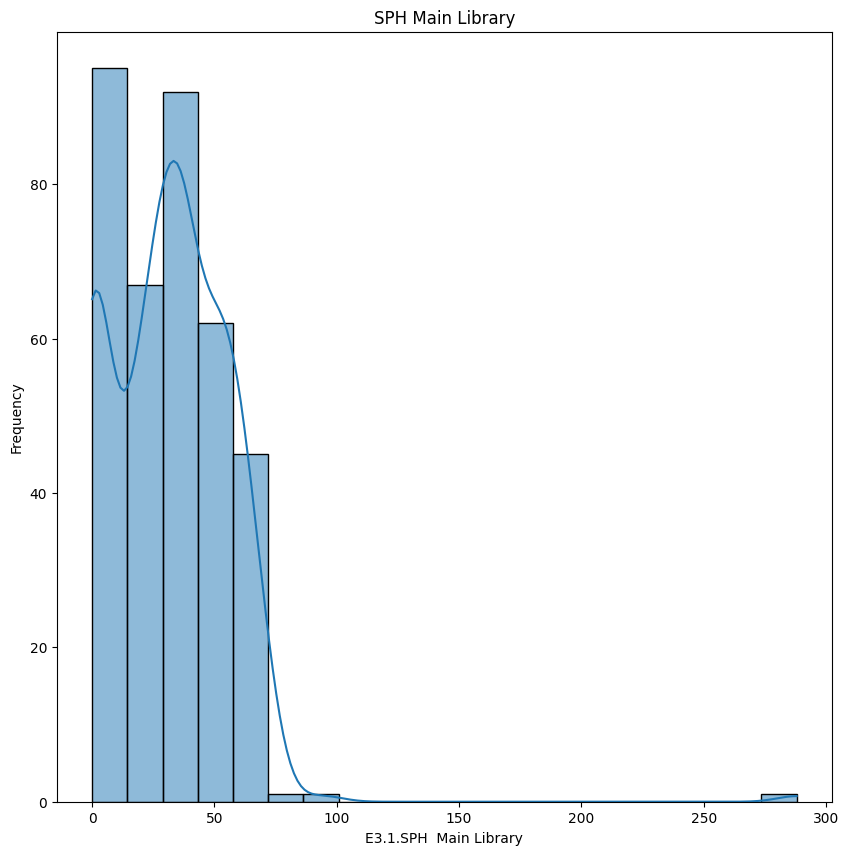

In [24]:
# Visualization - Data distribution
plt.figure(figsize=(10, 10))
sns.histplot(df['E3.1.SPH  Main Library'], bins=20, kde=True)
plt.title('SPH Main Library')
plt.xlabel('E3.1.SPH  Main Library')
plt.ylabel('Frequency')
plt.show()


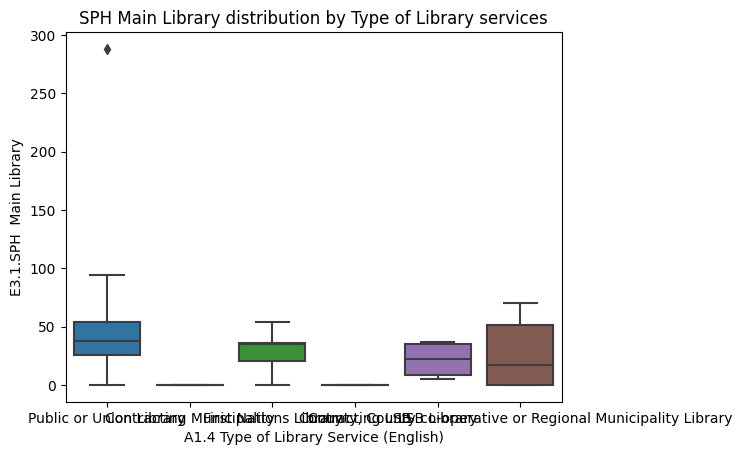

In [25]:
# Visualization - SPH Main Library distribution by Type of Library services
sns.boxplot(y='E3.1.SPH  Main Library', x='A1.4 Type of Library Service (English)', data=df)
plt.title('SPH Main Library distribution by Type of Library services')
plt.ylabel('E3.1.SPH  Main Library')
plt.xlabel('A1.4 Type of Library Service (English)')
plt.show()



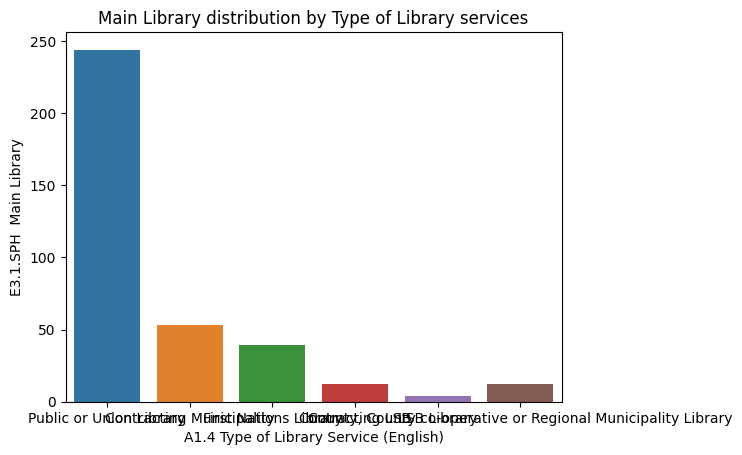

In [26]:
# Visualization 

sns.countplot(x='A1.4 Type of Library Service (English)', data=df)
plt.title('Main Library distribution by Type of Library services')
plt.xlabel('A1.4 Type of Library Service (English)')
plt.ylabel('E3.1.SPH  Main Library')
plt.show()




In [27]:
#Task 3

In [28]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)




Missing Values:
Library Full Name                                      0
Library Number                                         0
Survey Year From                                       0
A1.3 Ontario Library Service (OLS) Region (English)    0
A1.4 Type of Library Service (English)                 0
                                                      ..
P1.1  Resident Population Served                       0
P1.2  Contracting Population Served                    0
P2.1  Contracting Households Served                    0
P2.2  Resident Households Served                       0
Unnamed: 328                                           0
Length: 329, dtype: int64


In [32]:

# Calculate the Z-score for numeric columns
z_scores = df.select_dtypes(include=['int64', 'float64']).apply(zscore)

# Define a threshold for outliers (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Remove rows with outlier values for each numeric column
df_no_outliers = df[(z_scores.abs() < outlier_threshold).all(axis=1)]

print(df_no_outliers)

Empty DataFrame
Columns: [Library Full Name, Library Number, Survey Year From, A1.3 Ontario Library Service (OLS) Region (English), A1.4 Type of Library Service (English), A1.5 Mailing Address, A1.9 Street Address, A1.10 City/Town, A1.11 Province, A1.12 Postal Code, A1.13 Web Site Address, A1.14  No. of Active Library Cardholders, B1.1  Net Balance brought forward from previous year, B2.1.1  Public Library Operating Grant (PLOG), B2.1.2  Pay Equity Grant, B2.1.3  First Nation Salary Supplement Grant, B2.1.4  Total Provincial Operating Funding, B2.2  Local Operating Funding (e.g. Municipality or Band local operating funding), B2.3  Contract Revenue (funds from other municipalities, neighbouring public library boards, Local Services Boards or First Nation Bands that contract for library services). Specify name of contracting organization and amount received from each., B2.4.1.03  Trillium Foundation funding, B2.4.1.04  Provincial student employment funding, B2.4.1.05  ServiceOntario, B2.

In [37]:
df.head()



,Library Full Name,Library Number,Survey Year From,A1.3 Ontario Library Service (OLS) Region (English),A1.5 Mailing Address,A1.9 Street Address,A1.10 City/Town,A1.11 Province,A1.12 Postal Code,A1.13 Web Site Address,...,P2.1 Contracting Households Served,P2.2 Resident Households Served,Unnamed: 328,A1.4 Type of Library Service (English)_Contracting LSB,A1.4 Type of Library Service (English)_Contracting Municipality,"A1.4 Type of Library Service (English)_County, County co-operative or Regional Municipality Library",A1.4 Type of Library Service (English)_First Nations Library,A1.4 Type of Library Service (English)_LSB Library,A1.4 Type of Library Service (English)_Public or Union Library,log_transformed_column
0,Addington Highlands Twp,L0005,2022,Southern Ontario Library Service,3641 Flinton Rd. Box 72,3641 Flinton Rd.,Flinton,Ontario,K0H1P0,www.addingtonhighlandspubliclibrary.ca,...,0,"2,762",0,False,False,False,False,False,True,2.772589
1,Adjala-TosorontioTwp,L0003,2022,Southern Ontario Library Service,7855 Sideroad 30 R.R. #1,7855 Sideroad 30 R.R. #1,Alliston,Ontario,L9R1V1,www.adjtos.ca,...,0,"4,103",0,False,True,False,False,False,False,0.000000
2,Admaston/Bromley Twp,L0002,2022,Southern Ontario Library Service,Hwy 60 P O Box 130,5346 Highway 60,Douglas,Ontario,K0J1S0,http://www.admastonbromleylibrary.com,...,0,"1,408",0,False,False,False,False,False,True,2.564949
3,Ajax,L0032,2022,Southern Ontario Library Service,55 Harwood Avenue South,55 Harwood Avenue South,Ajax,Ontario,L1S2H8,ajaxlibrary.ca,...,0,"38,400",0,False,False,False,False,False,True,4.269697
4,Alberton Twp,L1098,2022,Ontario Library Service - North,3 Highway 611 South RR1B2,3 Highway 611 South RR1B2,Township of Alberton,Ontario,P9A3M2,http://www.alberton.ca/,...,0,373,0,False,True,False,False,False,False,0.000000


In [ ]:
# Perform one-hot encoding for a categorical variable
df = pd.get_dummies(df, columns=['A1.4 Type of Library Service (English)'])


 

In [38]:
#  Apply log transformation on a skewed numeric feature
df['log_transformed_column'] = np.log(df['E3.1.SPH  Main Library'] + 1)

In [50]:
#Task 4
df.head()

,Library Full Name,Library Number,Survey Year From,A1.3 Ontario Library Service (OLS) Region (English),A1.5 Mailing Address,A1.9 Street Address,A1.10 City/Town,A1.11 Province,A1.12 Postal Code,A1.13 Web Site Address,...,P2.1 Contracting Households Served,P2.2 Resident Households Served,Unnamed: 328,A1.4 Type of Library Service (English)_Contracting LSB,A1.4 Type of Library Service (English)_Contracting Municipality,"A1.4 Type of Library Service (English)_County, County co-operative or Regional Municipality Library",A1.4 Type of Library Service (English)_First Nations Library,A1.4 Type of Library Service (English)_LSB Library,A1.4 Type of Library Service (English)_Public or Union Library,log_transformed_column
0,Addington Highlands Twp,L0005,2022,Southern Ontario Library Service,3641 Flinton Rd. Box 72,3641 Flinton Rd.,Flinton,Ontario,K0H1P0,www.addingtonhighlandspubliclibrary.ca,...,0,"2,762",0,False,False,False,False,False,True,2.772589
1,Adjala-TosorontioTwp,L0003,2022,Southern Ontario Library Service,7855 Sideroad 30 R.R. #1,7855 Sideroad 30 R.R. #1,Alliston,Ontario,L9R1V1,www.adjtos.ca,...,0,"4,103",0,False,True,False,False,False,False,0.000000
2,Admaston/Bromley Twp,L0002,2022,Southern Ontario Library Service,Hwy 60 P O Box 130,5346 Highway 60,Douglas,Ontario,K0J1S0,http://www.admastonbromleylibrary.com,...,0,"1,408",0,False,False,False,False,False,True,2.564949
3,Ajax,L0032,2022,Southern Ontario Library Service,55 Harwood Avenue South,55 Harwood Avenue South,Ajax,Ontario,L1S2H8,ajaxlibrary.ca,...,0,"38,400",0,False,False,False,False,False,True,4.269697
4,Alberton Twp,L1098,2022,Ontario Library Service - North,3 Highway 611 South RR1B2,3 Highway 611 South RR1B2,Township of Alberton,Ontario,P9A3M2,http://www.alberton.ca/,...,0,373,0,False,True,False,False,False,False,0.000000


In [53]:
# Print the columns available in the dataset
print(df.columns)


Index(['Library Full Name', 'Library Number', 'Survey Year From',
       'A1.3 Ontario Library Service (OLS) Region (English)',
       'A1.5 Mailing Address', 'A1.9 Street Address', 'A1.10 City/Town',
       'A1.11 Province', 'A1.12 Postal Code', 'A1.13 Web Site Address',
       ...
       'P2.1  Contracting Households Served',
       'P2.2  Resident Households Served', 'Unnamed: 328',
       'A1.4 Type of Library Service (English)_Contracting LSB',
       'A1.4 Type of Library Service (English)_Contracting Municipality',
       'A1.4 Type of Library Service (English)_County, County co-operative or Regional Municipality Library',
       'A1.4 Type of Library Service (English)_First Nations Library',
       'A1.4 Type of Library Service (English)_LSB Library',
       'A1.4 Type of Library Service (English)_Public or Union Library',
       'log_transformed_column'],
      dtype='object', length=335)


In [76]:
# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['log_transformed_column'])
y = df['log_transformed_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
print(X_train)
print(y_train)

                            Library Full Name Library Number  \
210                      Merrickville-Wolford          L0204   
339                        Val Rita-Harty Twp          L0357   
299                          Sheshegwaning FN          L0419   
75                                Coleman Twp          L0101   
84                                  Deseronto          L0323   
..                                        ...            ...   
71                              Clearview Twp          L0115   
106                   Fauquier-Strickland Twp          L0055   
270  Powassan & District Union Public Library          L0273   
348                                   Welland          L0366   
102                                      Essa          L0387   

     Survey Year From A1.3 Ontario Library Service (OLS) Region (English)  \
210              2022                   Southern Ontario Library Service    
339              2022                    Ontario Library Service - North    


In [80]:
# Drop all non-numeric columns
data_numeric = df.select_dtypes(include='number')

# Split the data into features (X) and the target variable (y)
X = data_numeric.drop(columns=['log_transformed_column'])
y = data_numeric['log_transformed_column']


In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
# Model 1: Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [83]:
# Model 2: Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [84]:
# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

In [85]:
# Print the evaluation results
print("Random Forest:")
print("Mean Squared Error (MSE):", rf_mse)
print("R-squared (R2):", rf_r2)

print("\nSupport Vector Machine (SVM):")
print("Mean Squared Error (MSE):", svm_mse)
print("R-squared (R2):", svm_r2)

Random Forest:
Mean Squared Error (MSE): 0.00030451400736682084
R-squared (R2): 0.9998180257841394

Support Vector Machine (SVM):
Mean Squared Error (MSE): 1.6554966852653474
R-squared (R2): 0.010693420095623574


In [86]:
# Task 5 Visualization

In [89]:
df.head()

,Library Full Name,Library Number,Survey Year From,A1.3 Ontario Library Service (OLS) Region (English),A1.5 Mailing Address,A1.9 Street Address,A1.10 City/Town,A1.11 Province,A1.12 Postal Code,A1.13 Web Site Address,...,P2.1 Contracting Households Served,P2.2 Resident Households Served,Unnamed: 328,A1.4 Type of Library Service (English)_Contracting LSB,A1.4 Type of Library Service (English)_Contracting Municipality,"A1.4 Type of Library Service (English)_County, County co-operative or Regional Municipality Library",A1.4 Type of Library Service (English)_First Nations Library,A1.4 Type of Library Service (English)_LSB Library,A1.4 Type of Library Service (English)_Public or Union Library,log_transformed_column
0,Addington Highlands Twp,L0005,2022,Southern Ontario Library Service,3641 Flinton Rd. Box 72,3641 Flinton Rd.,Flinton,Ontario,K0H1P0,www.addingtonhighlandspubliclibrary.ca,...,0,"2,762",0,False,False,False,False,False,True,2.772589
1,Adjala-TosorontioTwp,L0003,2022,Southern Ontario Library Service,7855 Sideroad 30 R.R. #1,7855 Sideroad 30 R.R. #1,Alliston,Ontario,L9R1V1,www.adjtos.ca,...,0,"4,103",0,False,True,False,False,False,False,0.000000
2,Admaston/Bromley Twp,L0002,2022,Southern Ontario Library Service,Hwy 60 P O Box 130,5346 Highway 60,Douglas,Ontario,K0J1S0,http://www.admastonbromleylibrary.com,...,0,"1,408",0,False,False,False,False,False,True,2.564949
3,Ajax,L0032,2022,Southern Ontario Library Service,55 Harwood Avenue South,55 Harwood Avenue South,Ajax,Ontario,L1S2H8,ajaxlibrary.ca,...,0,"38,400",0,False,False,False,False,False,True,4.269697
4,Alberton Twp,L1098,2022,Ontario Library Service - North,3 Highway 611 South RR1B2,3 Highway 611 South RR1B2,Township of Alberton,Ontario,P9A3M2,http://www.alberton.ca/,...,0,373,0,False,True,False,False,False,False,0.000000


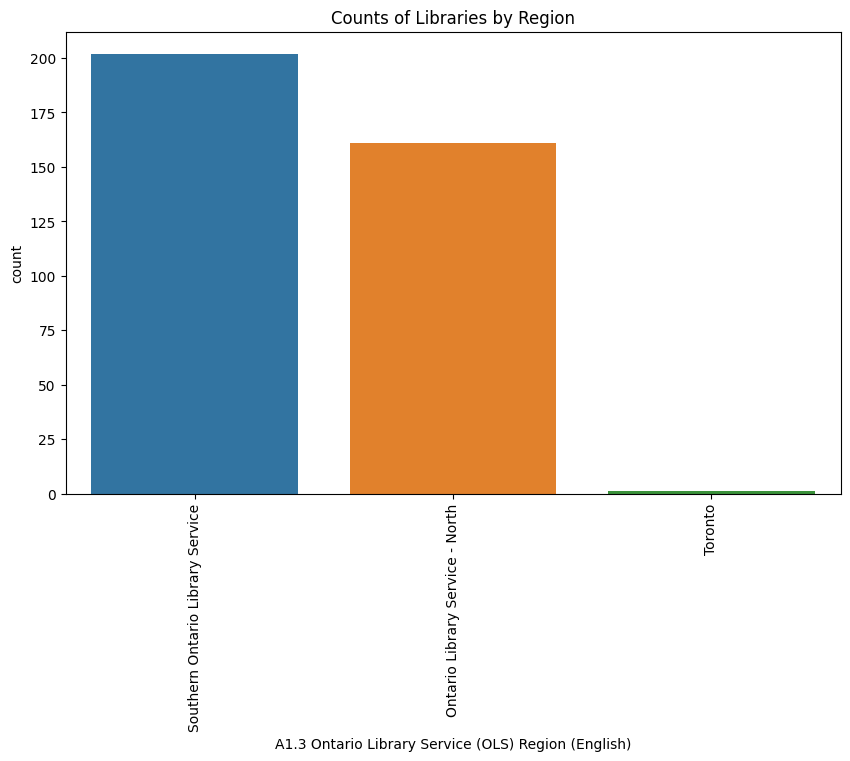

In [91]:
# Bar chart for counts of libraries by region
plt.figure(figsize=(10, 6))
sns.countplot(x='A1.3 Ontario Library Service (OLS) Region (English)', data=df)
plt.title('Counts of Libraries by Region')
plt.xticks(rotation=90)
plt.show()



C:\Users\hi2vi\AppData\Roaming\Python\Python39\site-packages\seaborn\utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
C:\Users\hi2vi\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


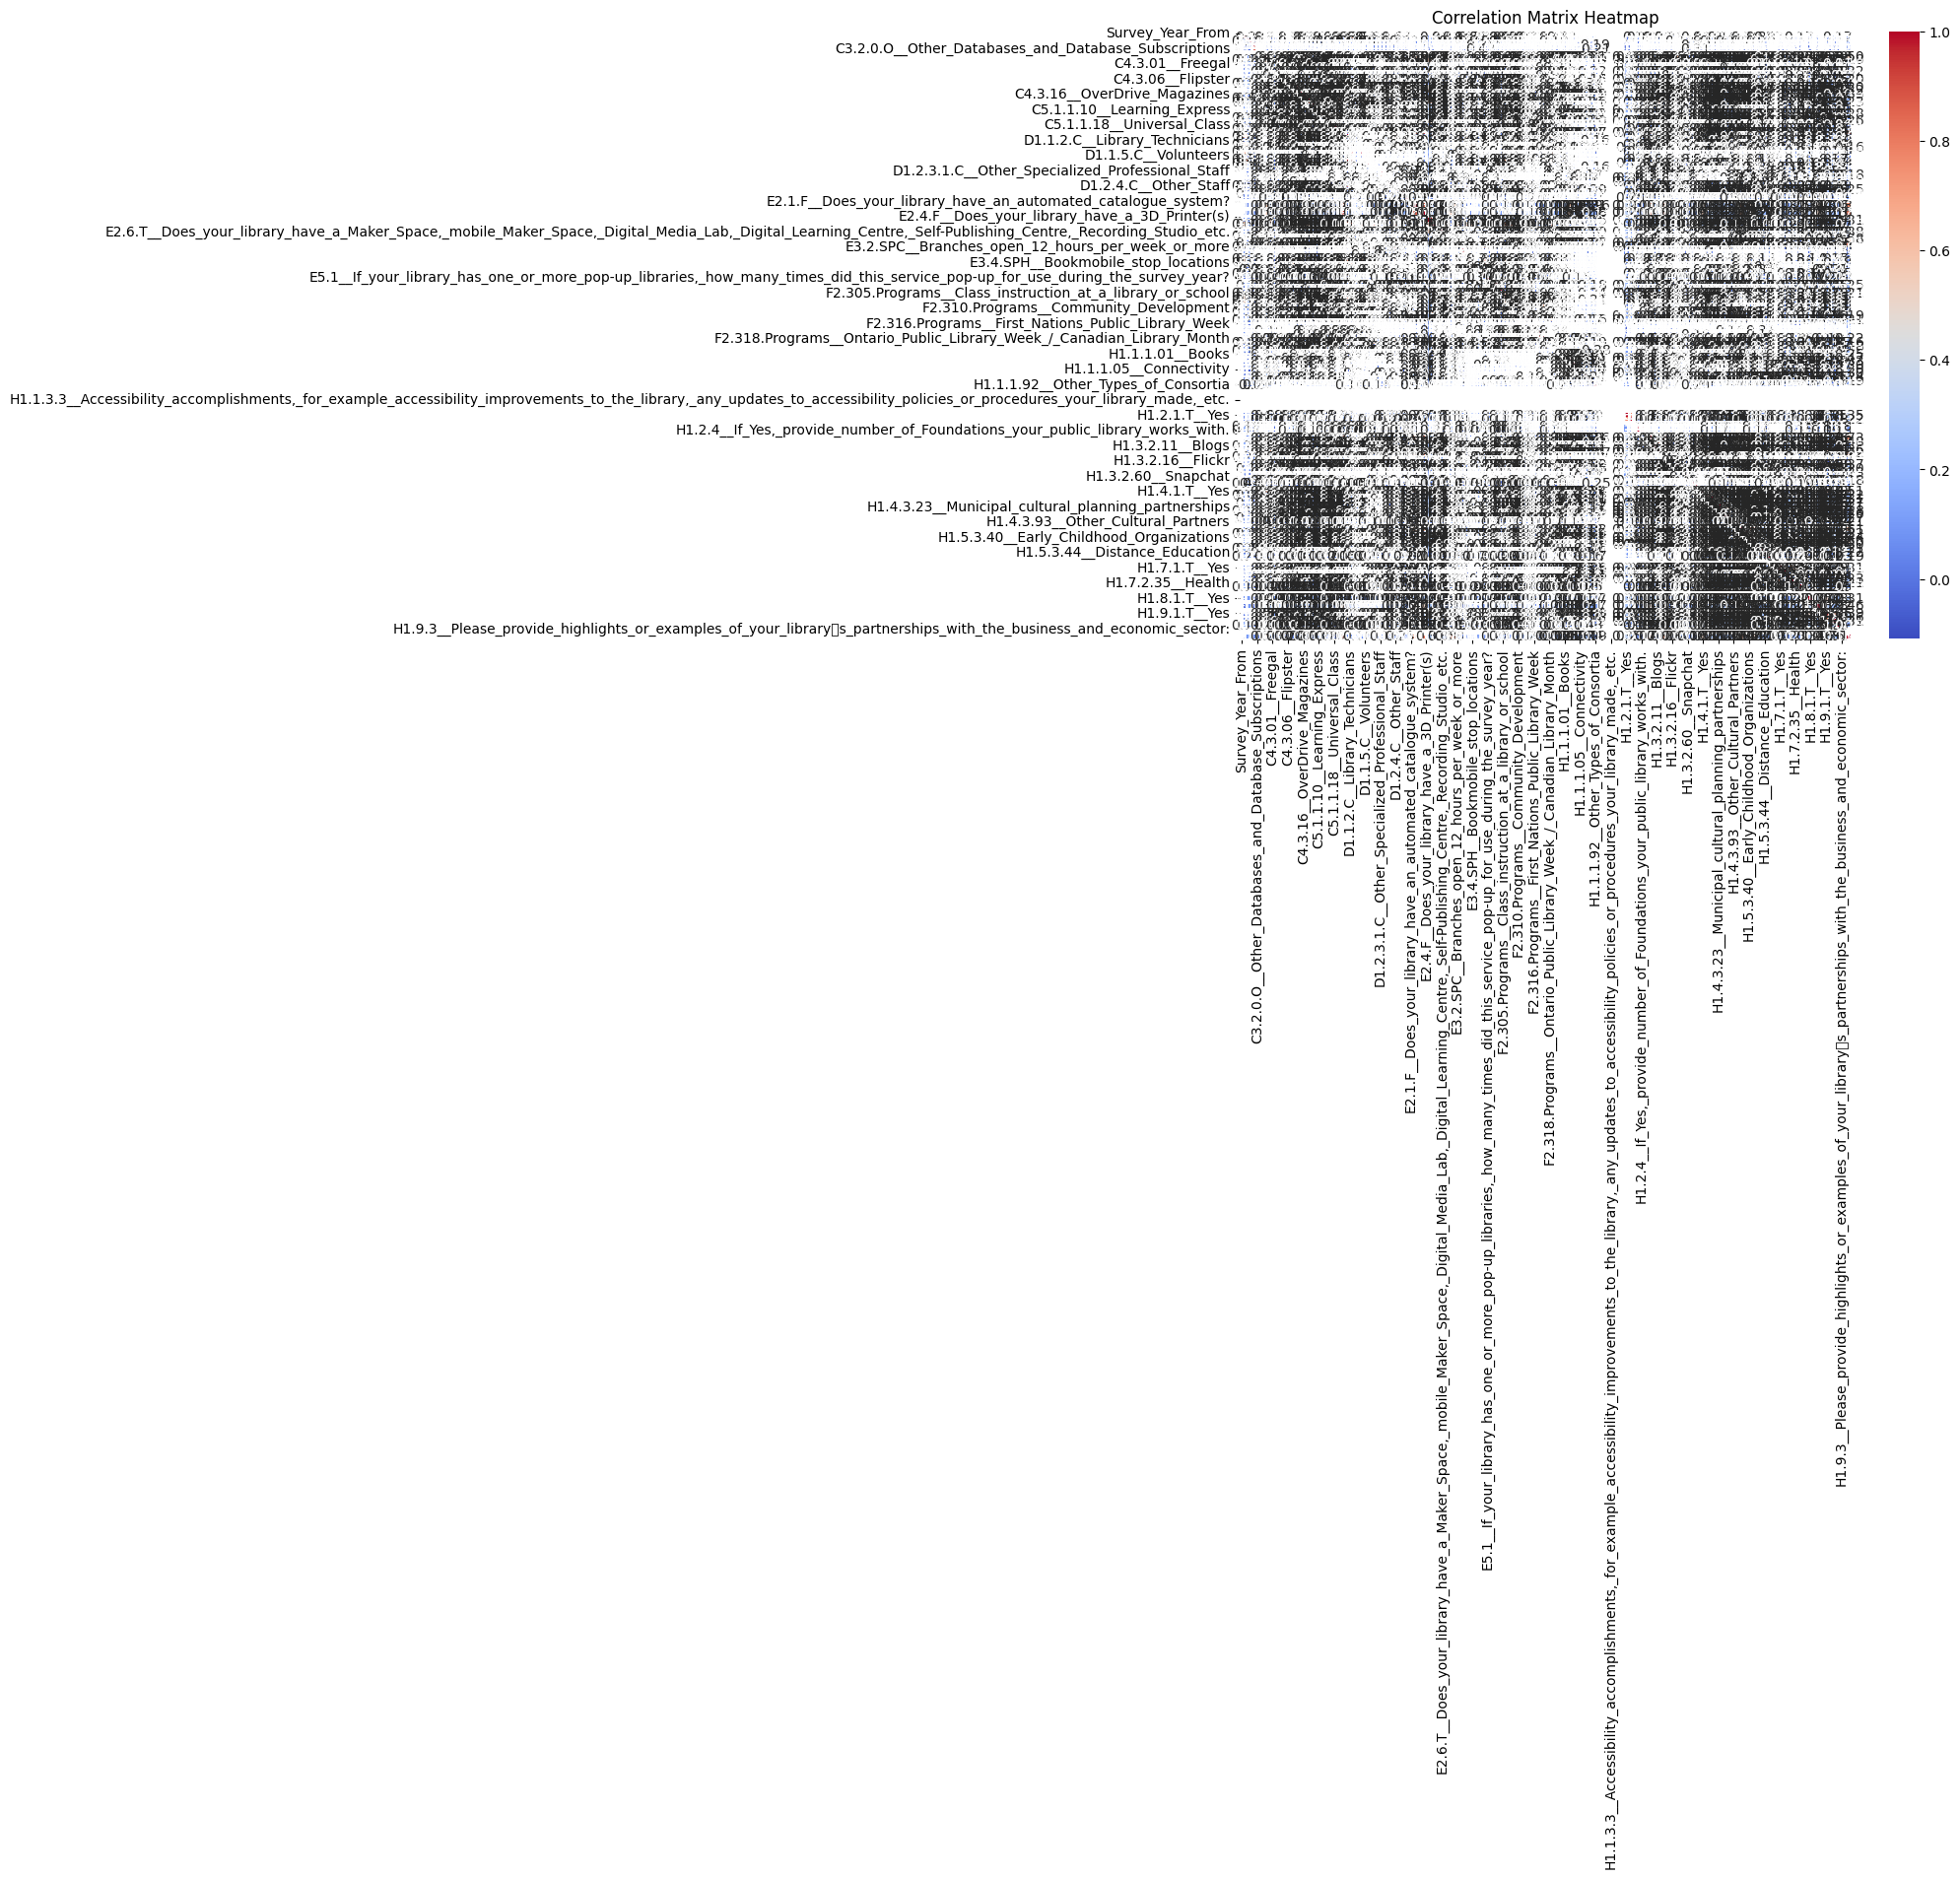

In [107]:
 
# Heatmap to visualize the correlation matrix
numerical_columns = df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()